# Part to fit the Model using $\chi^2$
## The model is $y(x) = ax^2 + bx + c $

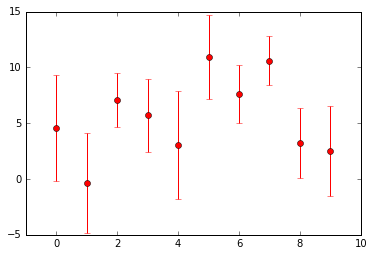

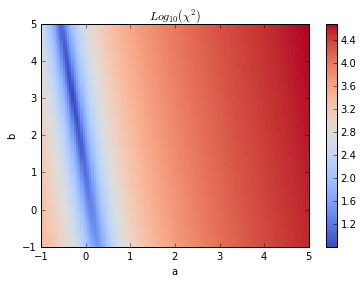

14 82 28
218408
6.47479317373
Results for a,b,c =  -0.305785123967 3.06611570248 1.0826446281
184 8.18318318318
342 14.3513513514
534 21.8468468468
[  8.18318318  14.35135135  21.84684685]


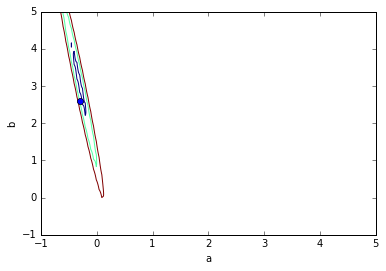

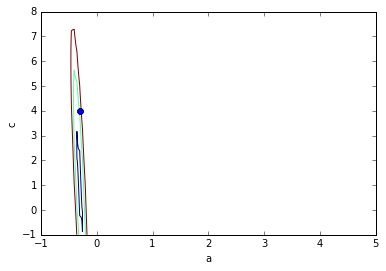

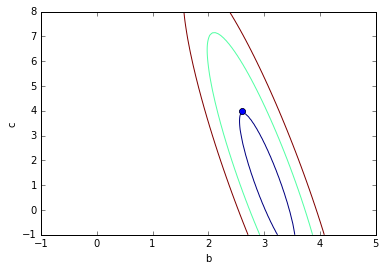

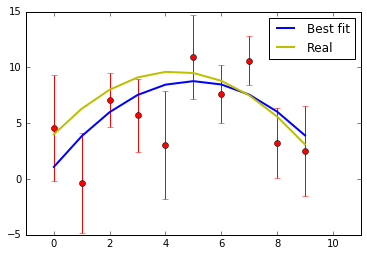

In [7]:
##Part to constrain different kind of surveys using Hessian Matrix of chi^2 (=> Fisher Matrix if L=exp(-chi^2/2))
###We start with the initial example using y=ax**2 + bx + c

###We use the model with 3 parameters 

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.special import erf
import math as mt


##read the data I have generated in this text file
x,y,err = np.loadtxt('Example_chi2.txt', delimiter=';')

##plot the points we have with the 1sigma errors
plt.errorbar(x,y,err, fmt='o', color='r')
plt.xlim(-1, 10)
plt.show()

nbb=122  ###number of bins we will use to calculate the chi^2 over each parameter

##Chi^2 array
tab_chi2 = np.zeros( (nbb, nbb, nbb) ) 

##Definition of parameters values we will use
tab_a = np.linspace(-1, 5, nbb)
tab_b = np.linspace(-1, 5, nbb)
tab_c = np.linspace(-1, 8, nbb)


###Chi^2 values computation 
###(here, no covriance matrix. All points are independent so we use jus the diagonal terms: errors)
for i in range(0,nbb):
    for j in range(0,nbb):
        for k in range(0,nbb):
            
            tab_chi2[i,j,k] = np.sum( np.power(tab_a[i]*np.power(x,2) + tab_b[j]*x + tab_c[k] - y,2)/np.power(err,2) )

  

##Array containing the index of tab_a, tab_b and tab_c corresponding to the minimum value of tab_chi2
t_min = np.unravel_index(tab_chi2.argmin(), tab_chi2.shape)

##plot the log(chi^2) value found in the (a,b) plan 
plt.pcolormesh(tab_a, tab_b, np.transpose(np.log10(tab_chi2[:,:,t_min[2]]) ), cmap='coolwarm')
plt.xlabel('a')
plt.ylabel('b')
plt.title('$Log_{10}(\chi^2)$')
plt.colorbar()
plt.show()



print t_min[0], t_min[1], t_min[2]
print np.argmin(tab_chi2)
print tab_chi2[t_min]

print 'Results for a,b,c = ',tab_a[t_min[0]], tab_b[t_min[1]], tab_c[t_min[2]]

#Values for 1,2 and 3 sigma for a gaussian
val1=0.68268949  
val2=0.95449974  
val3=0.9973002

vals = np.zeros(3)
vals[0] = val1
vals[1] = val2
vals[2] = val3

index_sig = np.zeros(3, int)


###Part to estimate the p-values contours using the Chi^2 cumulative distribution function
dof = len(x)-3     ##Number of degree of freedom
nbs = 1000         ##Number of points we will use to estimate the cuts
tab_val = np.linspace(1,40, nbs)    
tab_gi = np.zeros(nbs)    ###values of the GammaIncomplete function
for i in range(len(tab_val)):
    tab_gi[i] = sp.special.gammainc(dof/2.,tab_val[i]/2) #this one normalize directly by Gamma(k/2) so is directly the CDF of the Chi^2

#Find the values of Chi^2 corresponding to 1sigma, 2sigma and 3sigma
for i in range(len(vals)):
    index_sig[i] =  int(round(np.argmin( abs(tab_gi - vals[i]) )) )
    print index_sig[i], tab_val[index_sig[i]]

levels = tab_val[index_sig]   ###contain the vlues for 1, 2 and 3sigma for the good number of dof
print levels

#real values I use to generate the data
a=-0.3
b=2.6
c=4

##Names for the plot's legend 
tab_name=['$1 \sigma$', '$2 \sigma$', '$3 \sigma$' ]



##plot the p-values contours from the Chi^2 values using the values of levels

##Plan (a,b)
plt.contour(tab_a, tab_b, np.transpose(tab_chi2[:,:, t_min[2]]), levels)
plt.plot( [a,a], [b,b], 'o')  ###values I use to generate the data
plt.xlabel('a')
plt.ylabel('b')
plt.show()
plt.contour(tab_a, tab_c, np.transpose(tab_chi2[:,t_min[1] ,:]), levels)
##Plan (a,c)
plt.plot( [a,a], [c,c], 'o')  ###values I use to generate the data
plt.xlabel('a')
plt.ylabel('c')
plt.show()
##Plan (b,c)
plt.contour(tab_b, tab_c, np.transpose(tab_chi2[t_min[0] ,:,: ]), levels)
plt.plot( [b,b], [c,c], 'o')  ###values I use to generate the data
plt.xlabel('b')
plt.ylabel('c')
plt.show()

###Plot the best fit model and the original model
best_model = tab_a[t_min[0]]*np.power(x,2) + tab_b[t_min[1]]*x + tab_c[t_min[2]]
real_model = a*np.power(x,2) + b*x + c

plt.errorbar(x,y,err, fmt='o', color='r')
plt.plot(x, best_model, linewidth=2, color='blue', label='Best fit' )
plt.xlim(-1,11)
plt.plot(x, real_model, linewidth=2, color='y', label='Real')
plt.legend()
plt.show()





# Part to see the difference between p-value and $\Delta\chi^2$

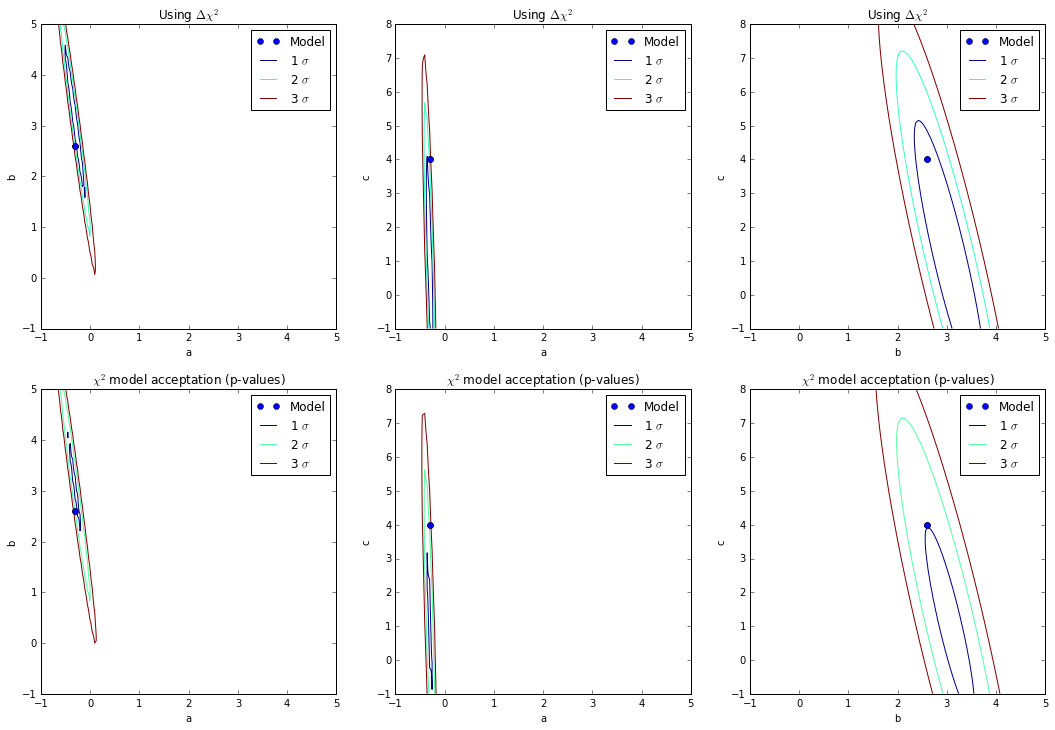

In [9]:
###Part to see the difference between the p-value contours and the Delta-chi^2 table assuming best-fit model as the real one
#####PART with the Delta_Chi^2 computed, not using the Hessain matrix (So not the good way to do)

tab_delta_chi2 = tab_chi2 - tab_chi2.min()

#It's for 3 parameters
cut_1s = 3.53
cut_2s = 8.02
cut_3s = 14.2

labels=['1 $\sigma$','2 $\sigma$','3 $\sigma$']  ###will be the names for the legend

lev_dc = np.array([cut_1s, cut_2s, cut_3s])


fig, ax = plt.subplots(2,3, figsize=(18,12))

cp = ax[0,0].contour(tab_a, tab_b, np.transpose(tab_delta_chi2[:,:, t_min[2]]), lev_dc)
ax[0,0].plot( [a,a], [b,b], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
cp = ax[1,0].contour(tab_a, tab_b, np.transpose(tab_chi2[:,:, t_min[2]]), levels)
ax[1,0].plot( [a,a], [b,b], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
ax[0,0].set_xlabel('a')
ax[0,0].set_ylabel('b')
ax[0,0].set_title('Using $\Delta\chi^2$')
ax[1,0].set_xlabel('a')
ax[1,0].set_ylabel('b')
ax[1,0].set_title('$\chi^2$ model acceptation (p-values)')
#plt.show()
cp = ax[0,1].contour(tab_a, tab_c, np.transpose(tab_delta_chi2[:,t_min[1] ,:]), lev_dc)
ax[0,1].plot( [a,a], [c,c], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
cp = ax[1,1].contour(tab_a, tab_c, np.transpose(tab_chi2[:,t_min[1] ,:]), levels)
ax[1,1].plot( [a,a], [c,c], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
ax[0,1].set_xlabel('a')
ax[0,1].set_ylabel('c')
ax[0,1].set_title('Using $\Delta\chi^2$')
ax[1,1].set_xlabel('a')
ax[1,1].set_ylabel('c')
ax[1,1].set_title('$\chi^2$ model acceptation (p-values)')

cp = ax[0,2].contour(tab_b, tab_c, np.transpose(tab_delta_chi2[t_min[0] ,:,: ]), lev_dc)
ax[0,2].plot( [b,b], [c,c], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
cp = ax[1,2].contour(tab_b, tab_c, np.transpose(tab_chi2[t_min[0] ,:,: ]), levels)
ax[1,2].plot( [b,b], [c,c], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
ax[0,2].set_xlabel('b')
ax[0,2].set_ylabel('c')
ax[0,2].set_title('Using $\Delta\chi^2$')
ax[1,2].set_xlabel('b')
ax[1,2].set_ylabel('c')
ax[1,2].set_title('$\chi^2$ model acceptation (p-values)')

for i in range(2):
    for j in range(3): ax[i,j].legend()
plt.show()

# Part to do it with the Hessian matrix (Correct way to do)

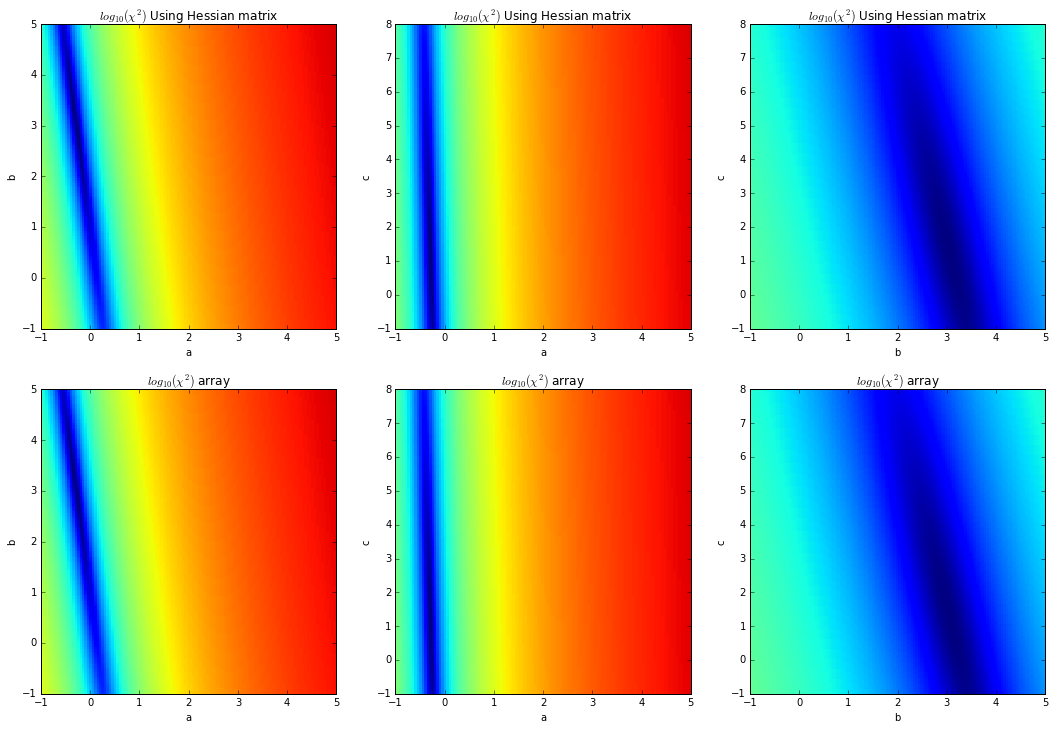

In [3]:
###Part to do it with the Hessian matrix

matrix_2nd_der = np.zeros( (3,3) )   ###because 3 parameters


factor = 1  ###This is a factor to chose the spread in the array to calculate the derivative values
delta_a = (tab_a[1] - tab_a[0])*factor
delta_b = (tab_b[1] - tab_b[0])*factor
delta_c = (tab_c[1] - tab_c[0])*factor

delta_i = np.array([delta_a, delta_b, delta_c])

##Diagonal terms

matrix_2nd_der[0,0] = (tab_chi2[t_min[0]+2*factor, t_min[1], t_min[2]] - 2*tab_chi2[t_min[0], t_min[1], t_min[2]] + tab_chi2[t_min[0]-2*factor, t_min[1], t_min[2]])/(4*delta_a**2)
matrix_2nd_der[1,1] = (tab_chi2[t_min[0], t_min[1]+2*factor, t_min[2]] - 2*tab_chi2[t_min[0], t_min[1], t_min[2]] + tab_chi2[t_min[0], t_min[1]-2*factor, t_min[2]])/(4*delta_b**2)
matrix_2nd_der[2,2] = (tab_chi2[t_min[0], t_min[1], t_min[2]+2*factor] - 2*tab_chi2[t_min[0], t_min[1], t_min[2]] + tab_chi2[t_min[0], t_min[1], t_min[2]-2*factor])/(4*delta_c**2)


##Off-diagonal terms (3 independants components 12=21 13=31 23=32, in index : 01=10 02=20 12=21)

matrix_2nd_der[0,1]= (tab_chi2[t_min[0]+1*factor, t_min[1]+1*factor, t_min[2]] - tab_chi2[t_min[0]-1*factor, t_min[1]+1*factor, t_min[2]] - tab_chi2[t_min[0]+1*factor, t_min[1]-1*factor, t_min[2]] + tab_chi2[t_min[0]-1*factor, t_min[1]-1*factor, t_min[2]]  )/(4.*delta_a*delta_b)
matrix_2nd_der[1,0] = matrix_2nd_der[0,1]

matrix_2nd_der[0,2]= (tab_chi2[t_min[0]+1*factor, t_min[1], t_min[2]+1*factor] - tab_chi2[t_min[0]-1*factor, t_min[1], t_min[2]+1*factor] - tab_chi2[t_min[0]+1*factor, t_min[1], t_min[2]-1*factor] + tab_chi2[t_min[0]-1*factor, t_min[1], t_min[2]-1*factor]  )/(4.*delta_a*delta_c)
matrix_2nd_der[2,0] = matrix_2nd_der[0,2]

matrix_2nd_der[1,2]= (tab_chi2[t_min[0], t_min[1]+1*factor, t_min[2]+1*factor] - tab_chi2[t_min[0], t_min[1]-1*factor, t_min[2]+1*factor] - tab_chi2[t_min[0], t_min[1]+1*factor, t_min[2]-1*factor] + tab_chi2[t_min[0], t_min[1]-1*factor, t_min[2]-1*factor]  )/(4.*delta_b*delta_c)
matrix_2nd_der[2,1] = matrix_2nd_der[1,2]

###Array to calculate the \chi^2 approximated by 2nd order derivative arround best parameter (Hessian matrix)
tab_approx_delta_chi2 = np.zeros( (nbb, nbb, nbb) )    

matrix_invert =  np.matrix(matrix_2nd_der).I

for i in range(nbb):
    for j in range(nbb):
        for k in range(nbb):
            vec_delta=np.array([ tab_a[i]-tab_a[t_min[0]] , tab_b[j]-tab_b[t_min[1]], tab_c[k]-tab_c[t_min[2]] ])
            tab_approx_delta_chi2[i,j,k] = np.dot( vec_delta, np.dot( matrix_2nd_der , vec_delta.reshape(3,1) ) )
            

fig, ax = plt.subplots(2,3, figsize=(18,12))
            
ax[0,0].pcolormesh(tab_a, tab_b, np.log10(np.transpose(0.5*tab_approx_delta_chi2[:,:, t_min[2] ])+tab_chi2.min()) , vmax=5 ) ###chi2_min in order to compare with tab_chi2 
ax[0,0].set_xlabel('a')
ax[0,0].set_ylabel('b')
ax[0,0].set_title('$log_{10}(\chi^2)$ Using Hessian matrix')
ax[1,0].pcolormesh(tab_a, tab_b, np.log10(np.transpose(tab_chi2[:,:, t_min[2] ])), vmax=5  )
ax[1,0].set_xlabel('a')
ax[1,0].set_ylabel('b')
ax[1,0].set_title('$log_{10}(\chi^2)$ array')


ax[0,1].pcolormesh(tab_a, tab_c, np.log10(np.transpose(0.5*tab_approx_delta_chi2[:, t_min[1], : ])+tab_chi2.min()) , vmax=5 ) ###chi2_min in order to compare with tab_chi2 
ax[0,1].set_xlabel('a')
ax[0,1].set_ylabel('c')
ax[0,1].set_title('$log_{10}(\chi^2)$ Using Hessian matrix')
ax[1,1].pcolormesh(tab_a, tab_c, np.log10(np.transpose(tab_chi2[:, t_min[1], : ])), vmax=5  )
ax[1,1].set_xlabel('a')
ax[1,1].set_ylabel('c')
ax[1,1].set_title('$log_{10}(\chi^2)$ array')


ax[0,2].pcolormesh(tab_b, tab_c, np.log10(np.transpose(0.5*tab_approx_delta_chi2[ t_min[0],:,: ])+tab_chi2.min()) , vmax=5 ) ###chi2_min in order to compare with tab_chi2 
ax[0,2].set_xlabel('b')
ax[0,2].set_ylabel('c')
ax[0,2].set_title('$log_{10}(\chi^2)$ Using Hessian matrix')
ax[1,2].pcolormesh(tab_b, tab_c, np.log10(np.transpose(tab_chi2[ t_min[0], :, : ])), vmax=5  )
ax[1,2].set_xlabel('b')
ax[1,2].set_ylabel('c')
ax[1,2].set_title('$log_{10}(\chi^2)$ array')
plt.show()



# Part to compare the contours obtained

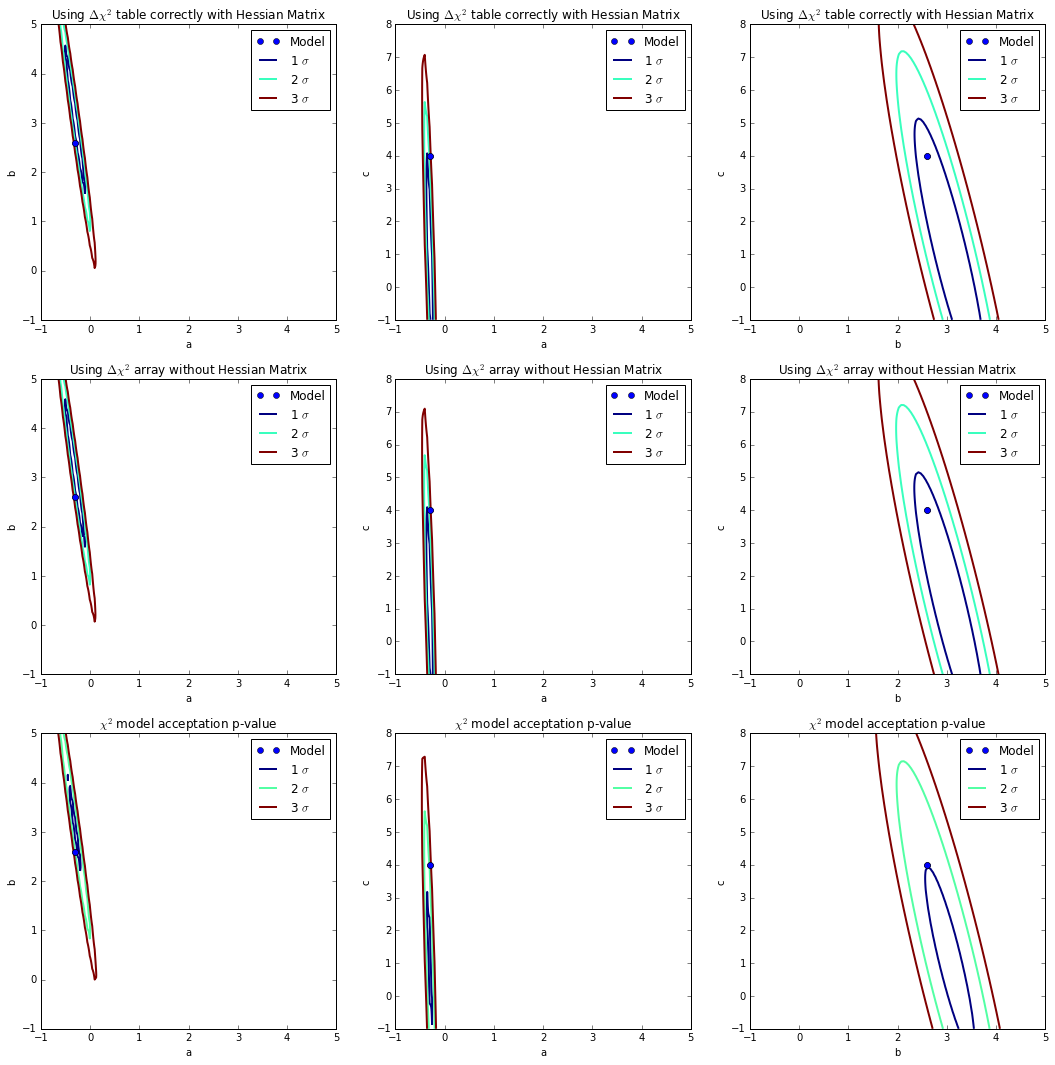

In [4]:
####Do the contours using the Hessian matrix using delta_chi2 table (THE CORRECT WAY TO DO)
####Compare with using the Delta_chi2 table on the chi^2-min(chi^2) array (WRONG WAY because not necessary close to a 2nd order polynome)
####Compare with the p-values contours from the chi^2 values

labels=['1 $\sigma$','2 $\sigma$','3 $\sigma$']  ###will be the names for the legend
fig, ax = plt.subplots(3,3, figsize=(18,18))

cp = ax[0,0].contour(tab_a, tab_b, np.transpose(0.5*tab_approx_delta_chi2[:,:, t_min[2]]), lev_dc, linewidths=2)
ax[0,0].plot( [a,a], [b,b], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
cp = ax[1,0].contour(tab_a, tab_b, np.transpose(tab_delta_chi2[:,:, t_min[2]]), lev_dc, linewidths=2)
ax[1,0].plot( [a,a], [b,b], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
cp = ax[2,0].contour(tab_a, tab_b, np.transpose(tab_chi2[:,:, t_min[2]]), levels, linewidths=2)
ax[2,0].plot( [a,a], [b,b], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
ax[0,0].set_xlabel('a')
ax[0,0].set_ylabel('b')
ax[0,0].set_title('Using $\Delta\chi^2$ table correctly with Hessian Matrix')
ax[1,0].set_xlabel('a')
ax[1,0].set_ylabel('b')
ax[1,0].set_title('Using $\Delta\chi^2$ array without Hessian Matrix')
ax[2,0].set_xlabel('a')
ax[2,0].set_ylabel('b')
ax[2,0].set_title('$\chi^2$ model acceptation p-value')

cp = ax[0,1].contour(tab_a, tab_c, np.transpose(0.5*tab_approx_delta_chi2[:,t_min[1] ,:]), lev_dc, linewidths=2)
ax[0,1].plot( [a,a], [c,c], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
cp = ax[1,1].contour(tab_a, tab_c, np.transpose(tab_delta_chi2[:,t_min[1] ,:]), lev_dc, linewidths=2)
ax[1,1].plot( [a,a], [c,c], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
cp = ax[2,1].contour(tab_a, tab_c, np.transpose(tab_chi2[:,t_min[1] ,:]), levels, linewidths=2)
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
#plt.legend()
ax[2,1].plot( [a,a], [c,c], 'o', label='Model')
ax[0,1].set_xlabel('a')
ax[0,1].set_ylabel('c')
ax[0,1].set_title('Using $\Delta\chi^2$ table correctly with Hessian Matrix')
ax[1,1].set_xlabel('a')
ax[1,1].set_ylabel('c')
ax[1,1].set_title('Using $\Delta\chi^2$ array without Hessian Matrix')
ax[2,1].set_xlabel('a')
ax[2,1].set_ylabel('c')
ax[2,1].set_title('$\chi^2$ model acceptation p-value')


    
cp =ax[0,2].contour(tab_b, tab_c, np.transpose(0.5*tab_approx_delta_chi2[t_min[0] ,:,: ]), lev_dc, linewidths=2)
ax[0,2].plot( [b,b], [c,c], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
cp = ax[1,2].contour(tab_b, tab_c, np.transpose(tab_delta_chi2[t_min[0], : ,:]), lev_dc, linewidths=2)
ax[1,2].plot( [b,b], [c,c], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
cp = ax[2,2].contour(tab_b, tab_c, np.transpose(tab_chi2[t_min[0] ,:,: ]), levels, linewidths=2)   ###cp = : in order to add legend
ax[2,2].plot( [b,b], [c,c], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
ax[0,2].set_xlabel('b')
ax[0,2].set_ylabel('c')
ax[0,2].set_title('Using $\Delta\chi^2$ table correctly with Hessian Matrix')
ax[1,2].set_xlabel('b')
ax[1,2].set_ylabel('c')
ax[1,2].set_title('Using $\Delta\chi^2$ array without Hessian Matrix')
ax[2,2].set_xlabel('b')
ax[2,2].set_ylabel('c')
ax[2,2].set_title('$\chi^2$ model acceptation p-value')

for i in range(3):
    for j in range(3): ax[i,j].legend()
#ax[2,2].legend()
#ax[2,1].legend()
#plt.legend(loc='upper left')
plt.show()

# Redo the same work but changing the step in the derivative calculation (not important here)

(14, 82, 28)
1.0826446281


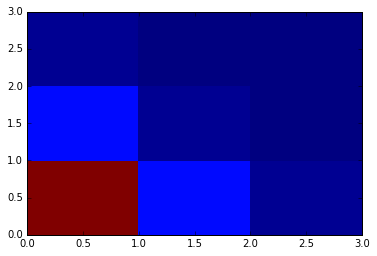

[[ 0.01508739 -0.13890528  0.21539033]
 [-0.13890528  1.35327994 -2.35087116]
 [ 0.21539033 -2.35087116  5.39907646]]


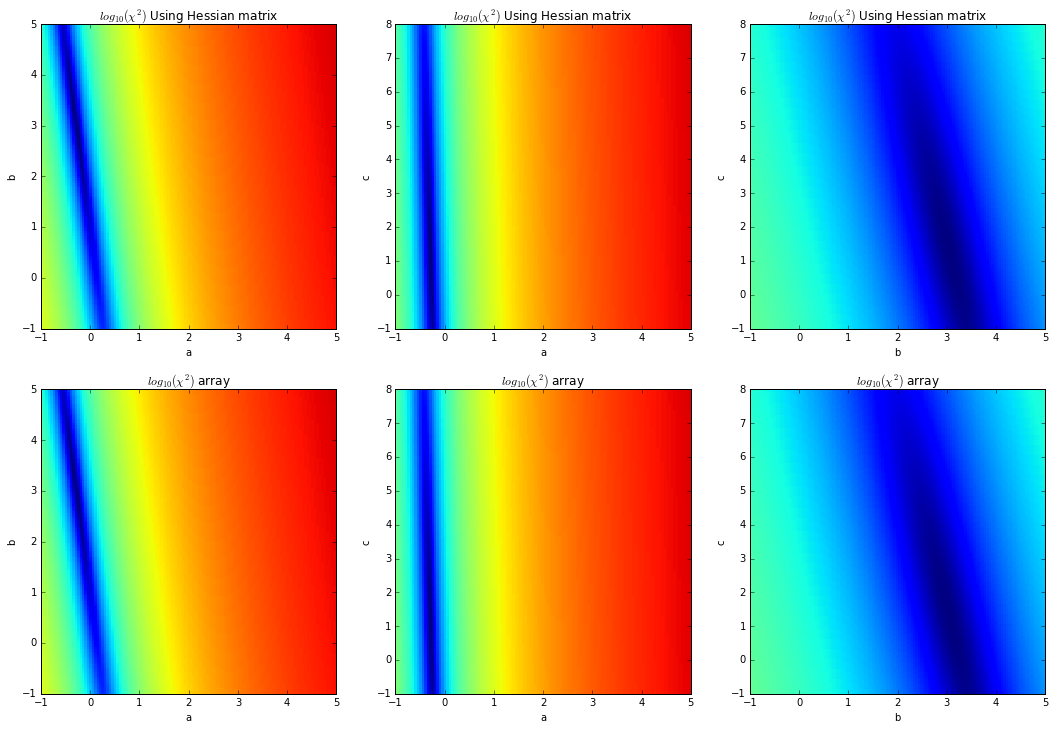

In [51]:
###Part to do it with the Hessian matrix

matrix_2nd_der = np.zeros( (3,3) )   ###because 3 parameters


factor = 5
delta_a = (tab_a[1] - tab_a[0])*factor
delta_b = (tab_b[1] - tab_b[0])*factor
delta_c = (tab_c[1] - tab_c[0])*factor

delta_i = np.array([delta_a, delta_b, delta_c])

##Diagonal terms

matrix_2nd_der[0,0] = (tab_chi2[t_min[0]+2*factor, t_min[1], t_min[2]] - 2*tab_chi2[t_min[0], t_min[1], t_min[2]] + tab_chi2[t_min[0]-2*factor, t_min[1], t_min[2]])/(4*delta_a**2)
matrix_2nd_der[1,1] = (tab_chi2[t_min[0], t_min[1]+2*factor, t_min[2]] - 2*tab_chi2[t_min[0], t_min[1], t_min[2]] + tab_chi2[t_min[0], t_min[1]-2*factor, t_min[2]])/(4*delta_b**2)
matrix_2nd_der[2,2] = (tab_chi2[t_min[0], t_min[1], t_min[2]+2*factor] - 2*tab_chi2[t_min[0], t_min[1], t_min[2]] + tab_chi2[t_min[0], t_min[1], t_min[2]-2*factor])/(4*delta_c**2)


##Off-diagonal terms (3 independants components 12=21 13=31 23=32, in index : 01=10 02=20 12=21)

matrix_2nd_der[0,1]= (tab_chi2[t_min[0]+1*factor, t_min[1]+1*factor, t_min[2]] - tab_chi2[t_min[0]-1*factor, t_min[1]+1*factor, t_min[2]] - tab_chi2[t_min[0]+1*factor, t_min[1]-1*factor, t_min[2]] + tab_chi2[t_min[0]-1*factor, t_min[1]-1*factor, t_min[2]]  )/(4.*delta_a*delta_b)
matrix_2nd_der[1,0] = matrix_2nd_der[0,1]

matrix_2nd_der[0,2]= (tab_chi2[t_min[0]+1*factor, t_min[1], t_min[2]+1*factor] - tab_chi2[t_min[0]-1*factor, t_min[1], t_min[2]+1*factor] - tab_chi2[t_min[0]+1*factor, t_min[1], t_min[2]-1*factor] + tab_chi2[t_min[0]-1*factor, t_min[1], t_min[2]-1*factor]  )/(4.*delta_a*delta_c)
matrix_2nd_der[2,0] = matrix_2nd_der[0,2]

matrix_2nd_der[1,2]= (tab_chi2[t_min[0], t_min[1]+1*factor, t_min[2]+1*factor] - tab_chi2[t_min[0], t_min[1]-1*factor, t_min[2]+1*factor] - tab_chi2[t_min[0], t_min[1]+1*factor, t_min[2]-1*factor] + tab_chi2[t_min[0], t_min[1]-1*factor, t_min[2]-1*factor]  )/(4.*delta_b*delta_c)
matrix_2nd_der[2,1] = matrix_2nd_der[1,2]

###Array to calculate the \chi^2 approximated by 2nd order derivative arround best parameter (Hessian matrix)
tab_approx_delta_chi2 = np.zeros( (nbb, nbb, nbb) )    

matrix_invert =  np.matrix(matrix_2nd_der).I

for i in range(nbb):
    for j in range(nbb):
        for k in range(nbb):
            vec_delta=np.array([ tab_a[i]-tab_a[t_min[0]] , tab_b[j]-tab_b[t_min[1]], tab_c[k]-tab_c[t_min[2]] ])
            tab_approx_delta_chi2[i,j,k] = np.dot( vec_delta, np.dot( matrix_2nd_der , vec_delta.reshape(3,1) ) )
            

fig, ax = plt.subplots(2,3, figsize=(18,12))
            
ax[0,0].pcolormesh(tab_a, tab_b, np.log10(np.transpose(0.5*tab_approx_delta_chi2[:,:, t_min[2] ])+tab_chi2.min()) , vmax=5 ) ###chi2_min in order to compare with tab_chi2 
ax[0,0].set_xlabel('a')
ax[0,0].set_ylabel('b')
ax[0,0].set_title('$log_{10}(\chi^2)$ Using Hessian matrix')
ax[1,0].pcolormesh(tab_a, tab_b, np.log10(np.transpose(tab_chi2[:,:, t_min[2] ])), vmax=5  )
ax[1,0].set_xlabel('a')
ax[1,0].set_ylabel('b')
ax[1,0].set_title('$log_{10}(\chi^2)$ array')


ax[0,1].pcolormesh(tab_a, tab_c, np.log10(np.transpose(0.5*tab_approx_delta_chi2[:, t_min[1], : ])+tab_chi2.min()) , vmax=5 ) ###chi2_min in order to compare with tab_chi2 
ax[0,1].set_xlabel('a')
ax[0,1].set_ylabel('c')
ax[0,1].set_title('$log_{10}(\chi^2)$ Using Hessian matrix')
ax[1,1].pcolormesh(tab_a, tab_c, np.log10(np.transpose(tab_chi2[:, t_min[1], : ])), vmax=5  )
ax[1,1].set_xlabel('a')
ax[1,1].set_ylabel('c')
ax[1,1].set_title('$log_{10}(\chi^2)$ array')


ax[0,2].pcolormesh(tab_b, tab_c, np.log10(np.transpose(0.5*tab_approx_delta_chi2[ t_min[0],:,: ])+tab_chi2.min()) , vmax=5 ) ###chi2_min in order to compare with tab_chi2 
ax[0,2].set_xlabel('b')
ax[0,2].set_ylabel('c')
ax[0,2].set_title('$log_{10}(\chi^2)$ Using Hessian matrix')
ax[1,2].pcolormesh(tab_b, tab_c, np.log10(np.transpose(tab_chi2[ t_min[0], :, : ])), vmax=5  )
ax[1,2].set_xlabel('b')
ax[1,2].set_ylabel('c')
ax[1,2].set_title('$log_{10}(\chi^2)$ array')
plt.show()



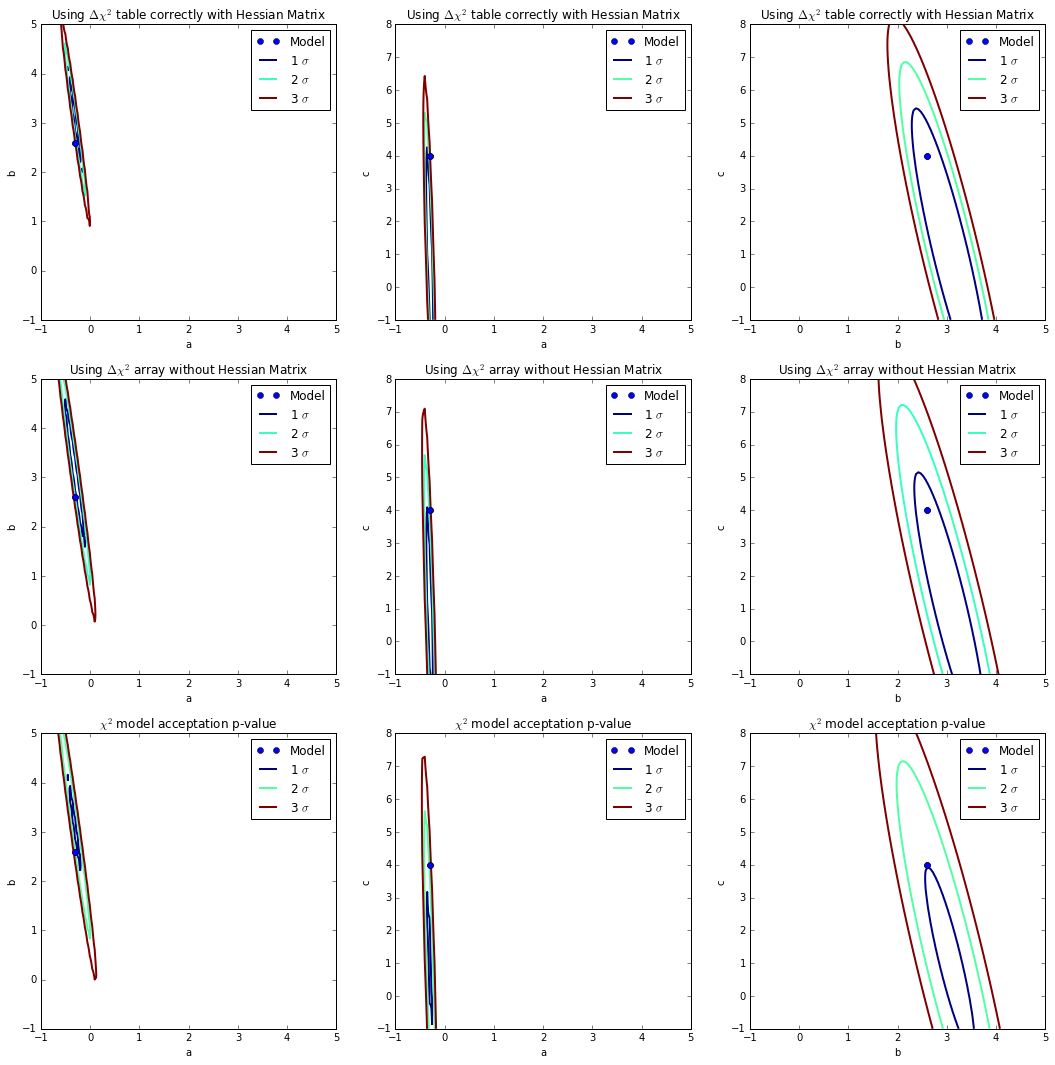

In [5]:
####Do the contours using the Fisher matrix using delta_chi2 table
####That's the same we did with the delta_chi2 array

labels=['1 $\sigma$','2 $\sigma$','3 $\sigma$']  ###will be the names for the legend
fig, ax = plt.subplots(3,3, figsize=(18,18))

cp = ax[0,0].contour(tab_a, tab_b, np.transpose(tab_approx_delta_chi2[:,:, t_min[2]]), lev_dc, linewidths=2)
ax[0,0].plot( [a,a], [b,b], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
cp = ax[1,0].contour(tab_a, tab_b, np.transpose(tab_delta_chi2[:,:, t_min[2]]), lev_dc, linewidths=2)
ax[1,0].plot( [a,a], [b,b], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
cp = ax[2,0].contour(tab_a, tab_b, np.transpose(tab_chi2[:,:, t_min[2]]), levels, linewidths=2)
ax[2,0].plot( [a,a], [b,b], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
ax[0,0].set_xlabel('a')
ax[0,0].set_ylabel('b')
ax[0,0].set_title('Using $\Delta\chi^2$ table correctly with Hessian Matrix')
ax[1,0].set_xlabel('a')
ax[1,0].set_ylabel('b')
ax[1,0].set_title('Using $\Delta\chi^2$ array without Hessian Matrix')
ax[2,0].set_xlabel('a')
ax[2,0].set_ylabel('b')
ax[2,0].set_title('$\chi^2$ model acceptation p-value')

cp = ax[0,1].contour(tab_a, tab_c, np.transpose(tab_approx_delta_chi2[:,t_min[1] ,:]), levels, linewidths=2)
ax[0,1].plot( [a,a], [c,c], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
cp = ax[1,1].contour(tab_a, tab_c, np.transpose(tab_delta_chi2[:,t_min[1] ,:]), lev_dc, linewidths=2)
ax[1,1].plot( [a,a], [c,c], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
cp = ax[2,1].contour(tab_a, tab_c, np.transpose(tab_chi2[:,t_min[1] ,:]), levels, linewidths=2)
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
#plt.legend()
ax[2,1].plot( [a,a], [c,c], 'o', label='Model')
ax[0,1].set_xlabel('a')
ax[0,1].set_ylabel('c')
ax[0,1].set_title('Using $\Delta\chi^2$ table correctly with Hessian Matrix')
ax[1,1].set_xlabel('a')
ax[1,1].set_ylabel('c')
ax[1,1].set_title('Using $\Delta\chi^2$ array without Hessian Matrix')
ax[2,1].set_xlabel('a')
ax[2,1].set_ylabel('c')
ax[2,1].set_title('$\chi^2$ model acceptation p-value')


    
cp =ax[0,2].contour(tab_b, tab_c, np.transpose(tab_approx_delta_chi2[t_min[0] ,:,: ]), levels, linewidths=2)
ax[0,2].plot( [b,b], [c,c], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
cp = ax[1,2].contour(tab_b, tab_c, np.transpose(tab_delta_chi2[t_min[0], : ,:]), lev_dc, linewidths=2)
ax[1,2].plot( [b,b], [c,c], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
cp = ax[2,2].contour(tab_b, tab_c, np.transpose(tab_chi2[t_min[0] ,:,: ]), levels, linewidths=2)   ###cp = : in order to add legend
ax[2,2].plot( [b,b], [c,c], 'o', label='Model')
for i in range(3): cp.collections[i].set_label(labels[i]) ###Way to add legend for countours
ax[0,2].set_xlabel('b')
ax[0,2].set_ylabel('c')
ax[0,2].set_title('Using $\Delta\chi^2$ table correctly with Hessian Matrix')
ax[1,2].set_xlabel('b')
ax[1,2].set_ylabel('c')
ax[1,2].set_title('Using $\Delta\chi^2$ array without Hessian Matrix')
ax[2,2].set_xlabel('b')
ax[2,2].set_ylabel('c')
ax[2,2].set_title('$\chi^2$ model acceptation p-value')

for i in range(3):
    for j in range(3): ax[i,j].legend()
#ax[2,2].legend()
#ax[2,1].legend()
#plt.legend(loc='upper left')
plt.show()